# Plotting and Visualization
* Making informative visualizations (sometimes called plots) is one of the most impor‐
tant tasks in data analysis

## A Brief matplotlib API Primer

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

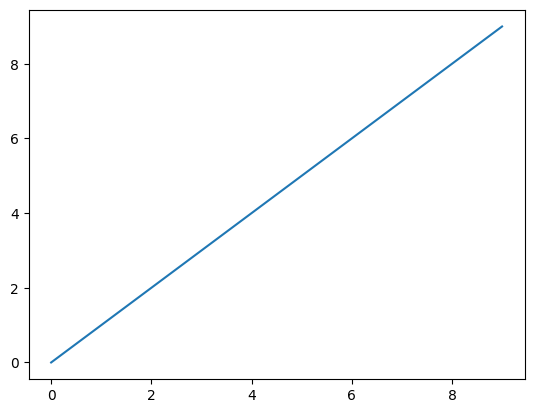

In [3]:
plt.plot(data)

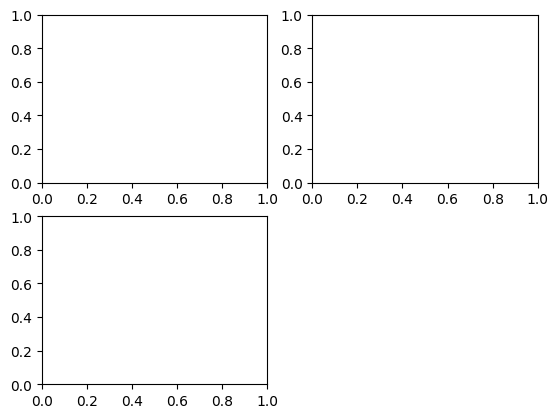

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

In [10]:
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="dashed")

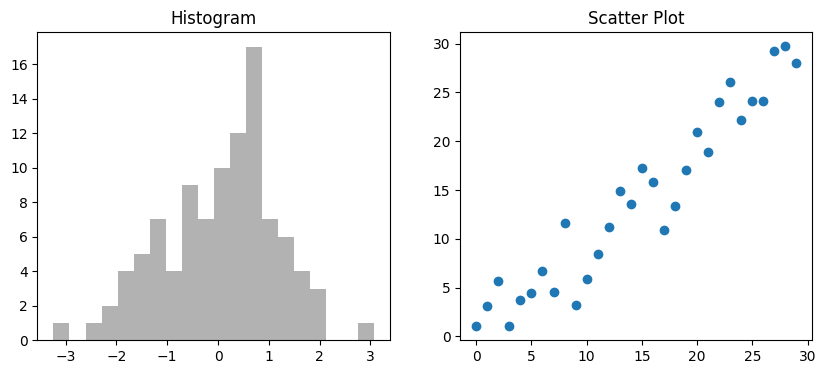

In [19]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot a histogram on ax1
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax1.set_title("Histogram")

# Plot a scatter plot on ax2
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
ax2.set_title("Scatter Plot")

# Display the plots
plt.show()

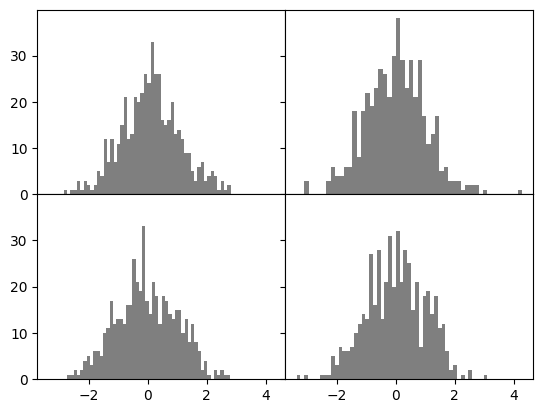

In [14]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
        fig.subplots_adjust(wspace=0, hspace=0)

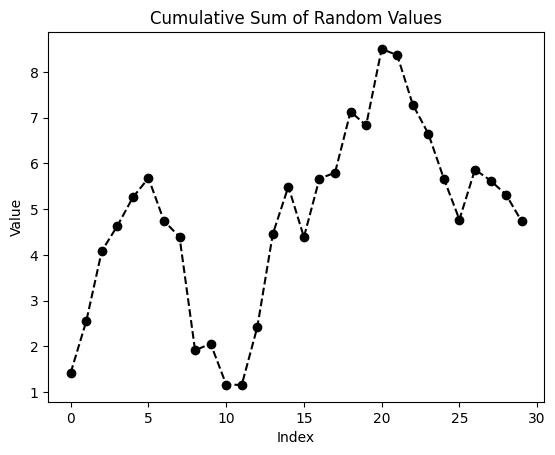

In [20]:
# Create a figure and add a subplot
fig = plt.figure()
ax = fig.add_subplot()

# Plot with a dashed line and circle markers
ax.plot(np.random.standard_normal(30).cumsum(), color="black", linestyle="dashed", marker="o")

# Optional: Add labels and title
ax.set_title("Cumulative Sum of Random Values")
ax.set_xlabel("Index")
ax.set_ylabel("Value")

# Display the plot
plt.show()

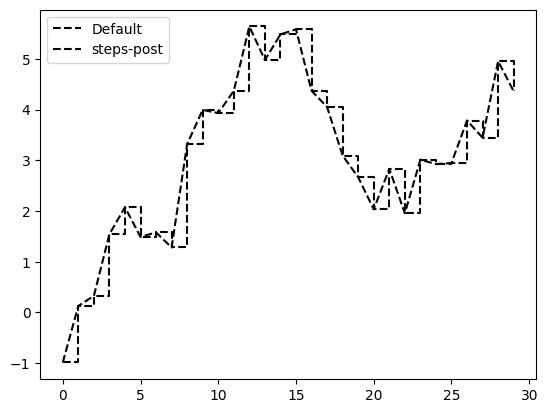

In [23]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed", drawstyle="steps-post", label="steps-post");
ax.legend()

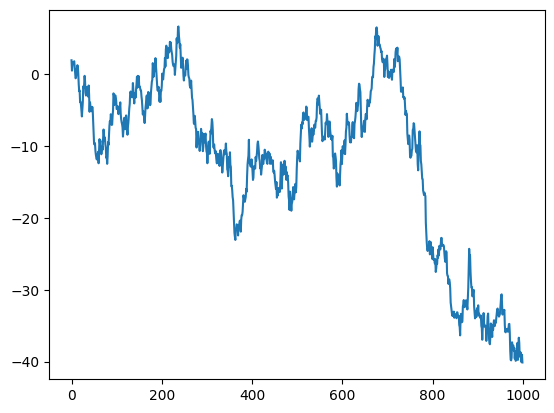

In [25]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())

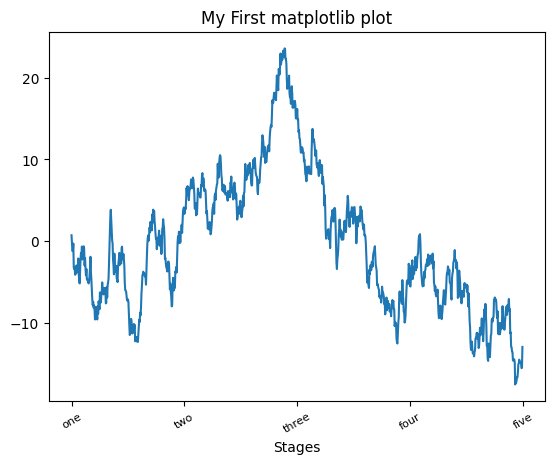

In [31]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(["one","two","three","four","five"],
                           rotation=30, fontsize=8)
ax.set_xlabel("Stages")
ax.set_title("My First matplotlib plot")
plt.show()

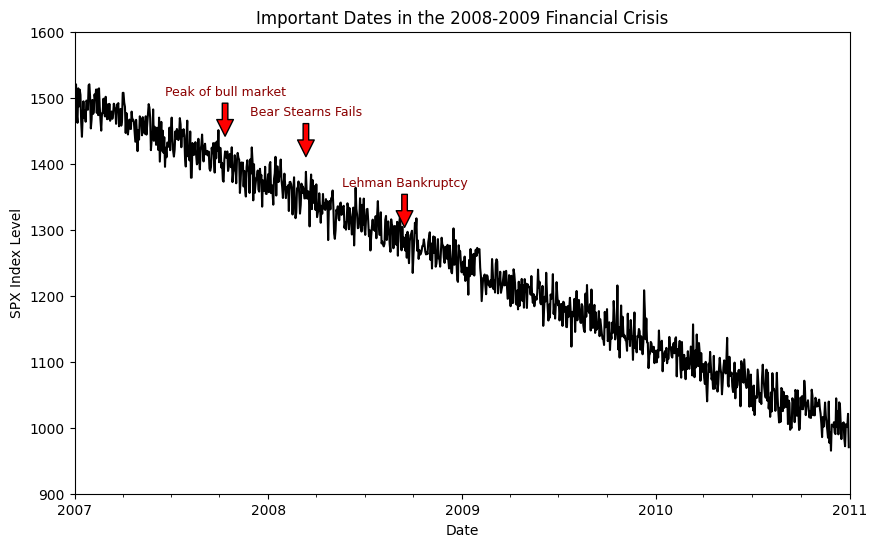

In [36]:

dates = pd.date_range(start="2007-01-01", end="2010-12-31", freq="B") 
trend = np.linspace(1500, 1000, len(dates))  
spx = pd.Series(trend + np.random.normal(0, 20, len(dates)), index=dates) 


fig, ax = plt.subplots(figsize=(10, 6))


spx.plot(ax=ax, color="black")


crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(
        label,
        xy=(date, spx.asof(date) + 20),  
        xytext=(date, spx.asof(date) + 100),  
        arrowprops=dict(facecolor="red", shrink=0.05),
        fontsize=9, color="darkred",
        horizontalalignment="center", verticalalignment="top"
    )


ax.set_xlim(["2007-01-01", "2011-01-01"])
ax.set_ylim([900, 1600])


ax.set_title("Important Dates in the 2008-2009 Financial Crisis")
ax.set_xlabel("Date")
ax.set_ylabel("SPX Index Level")


plt.show()

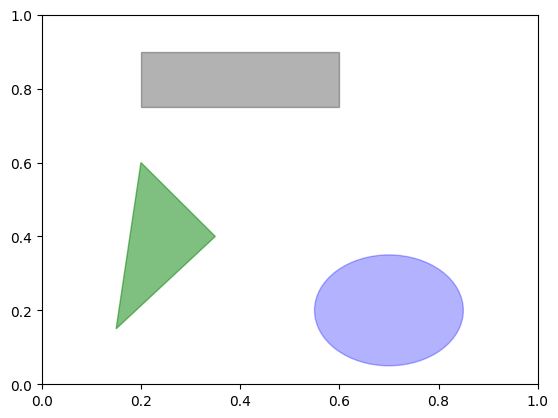

In [37]:
# Create figure and axis
fig, ax = plt.subplots()

# Create and add a semi-transparent black rectangle
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
ax.add_patch(rect)

# Create and add a semi-transparent blue circle
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
ax.add_patch(circ)

# Create and add a semi-transparent green polygon
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color="green", alpha=0.5)
ax.add_patch(pgon)

# Set limits for better visibility
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Display the plot
plt.show()

## Plotting with pandas and seaborn
* matplotlib can be a fairly low-level tool. You assemble a plot from its base compo‐
nents: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.),
legend, title, tick labels, and other annotations.
In pandas, we may have multiple columns of data, along with row and column labels.
pandas itself has built-in methods that simplify creating visualizations from Data‐
Frame and Series objects. Another library is seaborn, a high-level statistical graphics
library built on matplotlib. seaborn simplifies creating many common visualization
types.

In [38]:
s= pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0,
100, 10))
s

0     1.010694
10    0.267466
20   -0.127756
30   -0.953535
40   -0.863915
50   -2.769733
60   -3.337819
70   -3.853576
80   -2.589645
90   -2.438947
dtype: float64

<Axes: >

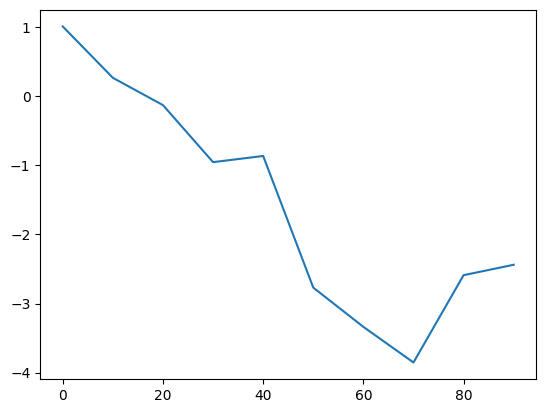

In [39]:
s.plot()

<Axes: >

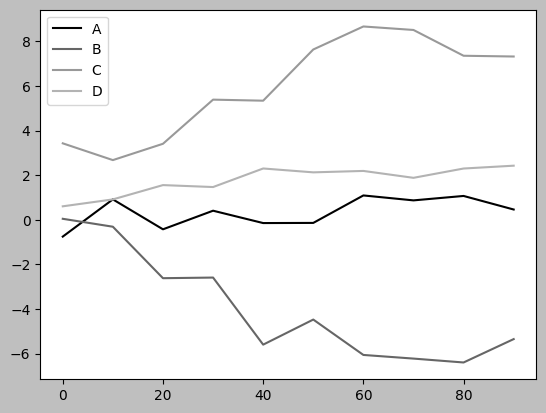

In [42]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
....: columns=["A", "B", "C", "D"],
....: index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot()

<Axes: >

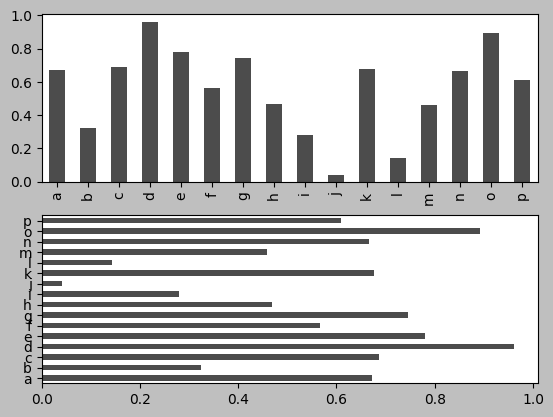

In [44]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

In [45]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
....: index=["one", "two", "three", "four", "five", "six"],
....: columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.217725,0.474056,0.667620,0.195318
two,0.732172,0.763824,0.522529,0.858801
three,0.224740,0.537737,0.894164,0.704152
four,0.806874,0.222093,0.572781,0.324043
five,0.658916,0.522610,0.625489,0.617670
six,0.736436,0.798882,0.061878,0.948377


<Axes: >

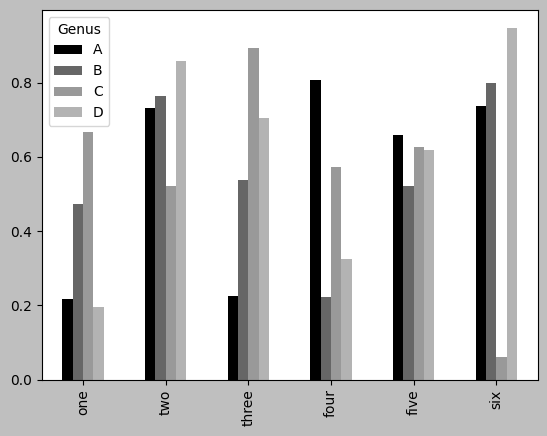

In [46]:
df.plot.bar()

<Axes: >

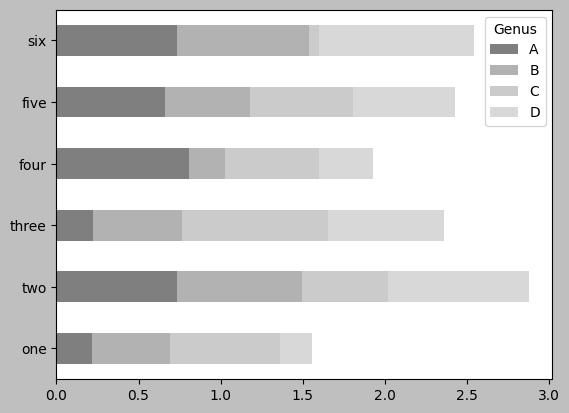

In [47]:
df.plot.barh(stacked=True, alpha=0.5)

In [49]:
# Sample data similar to the tips dataset
data = {
    "day": ["Thur", "Fri", "Fri", "Sat", "Sat", "Sun", "Sun", "Sun"],
    "size": [2, 2, 4, 2, 4, 2, 4, 6]
}
tips = pd.DataFrame(data)

# Create cross-tabulation and reorder days
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])

# Display the result
party_counts

size,2,4,6
day,,,
Thur,1,0,0
Fri,1,1,0
Sat,1,1,0
Sun,1,1,1


In [53]:
party_counts = party_counts.loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")
party_pcts

size,2,4
day,,
Thur,1.0,0.0
Fri,0.5,0.5
Sat,0.5,0.5
Sun,0.5,0.5


In [56]:
# Sample data similar to the tips dataset
data = {
    "total_bill": [20.00, 35.00, 40.00],
    "tip": [3.00, 5.00, 6.00]
}
tips = pd.DataFrame(data)

# Calculate tip percentage based on subtotal (excluding tip)
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])

# Display the DataFrame
tips

,total_bill,tip,tip_pct
0,20.0,3.0,0.176471
1,35.0,5.0,0.166667
2,40.0,6.0,0.176471


## Histograms and Density Plots

<Axes: ylabel='Count'>

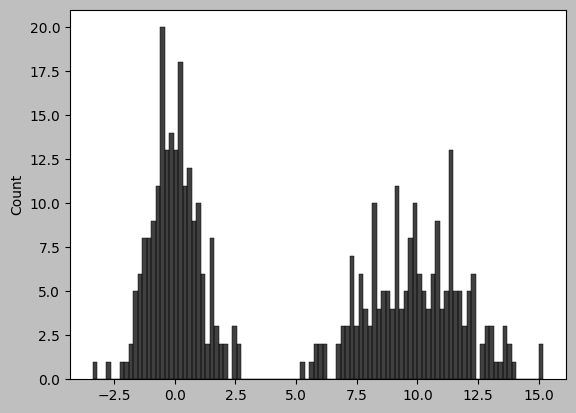

In [59]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100, color="black")

## Scatter or Point Plots

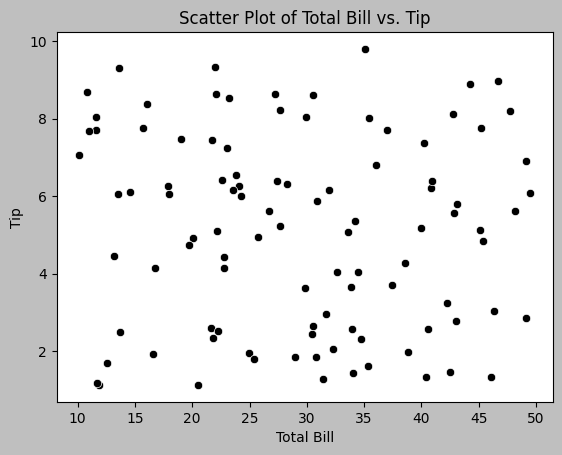

In [60]:
# Create a sample dataset
np.random.seed(10)
data = {
    "total_bill": np.random.uniform(10, 50, 100),   # Random total bills between 10 and 50
    "tip": np.random.uniform(1, 10, 100),           # Random tips between 1 and 10
    "day": np.random.choice(["Thur", "Fri", "Sat", "Sun"], 100),  # Random days
    "size": np.random.choice([1, 2, 3, 4, 5, 6], 100)             # Random party sizes
}

tips = pd.DataFrame(data)
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.title("Scatter Plot of Total Bill vs. Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

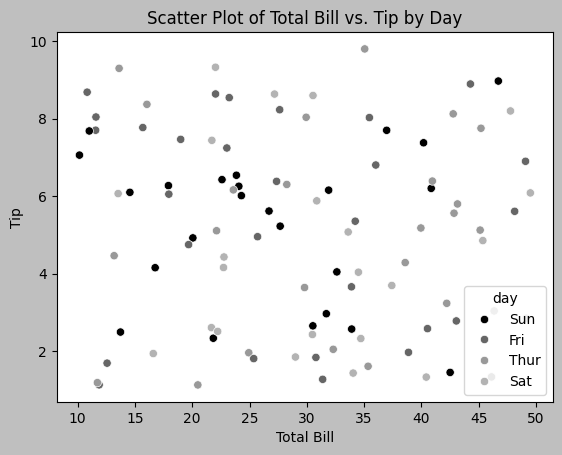

In [61]:
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips)
plt.title("Scatter Plot of Total Bill vs. Tip by Day")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

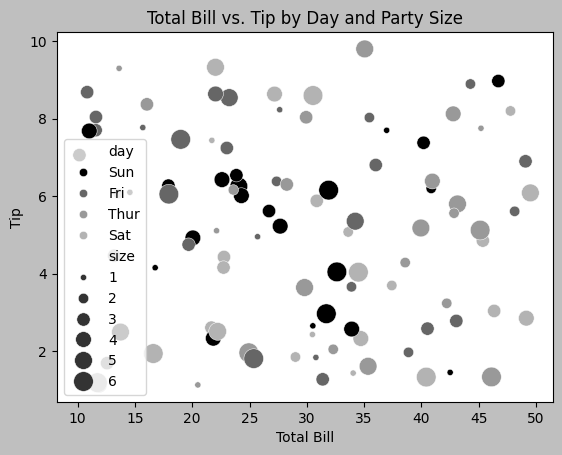

In [62]:
sns.scatterplot(x="total_bill", y="tip", hue="day", size="size", data=tips, sizes=(20, 200))
plt.title("Total Bill vs. Tip by Day and Party Size")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

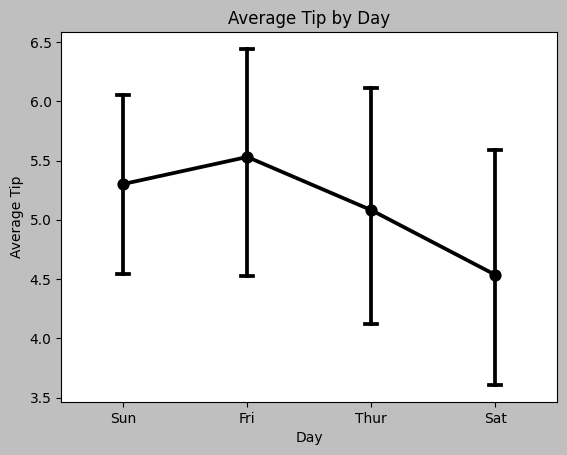

In [63]:
sns.pointplot(x="day", y="tip", data=tips, capsize=0.1)
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()

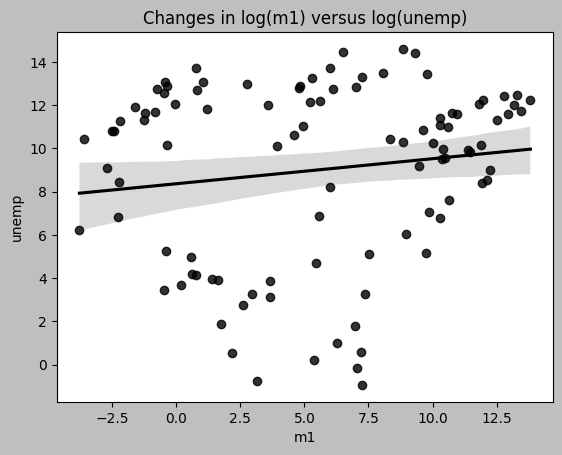

In [64]:
# Create sample data for the example
np.random.seed(0)
trans_data = pd.DataFrame({
    "m1": np.random.randn(100).cumsum(),        # Cumulative sum of random values for m1
    "unemp": np.random.randn(100).cumsum()      # Cumulative sum of random values for unemp
})

# Create the regression plot
fig, ax = plt.subplots()
sns.regplot(x="m1", y="unemp", data=trans_data, ax=ax)

# Set the title
ax.set_title("Changes in log(m1) versus log(unemp)")

# Show the plot
plt.show()

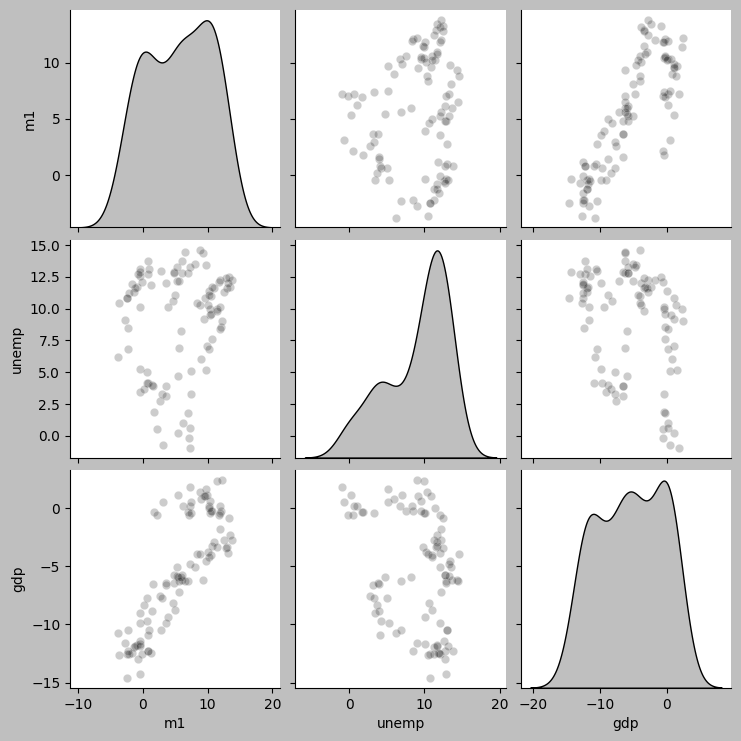

In [65]:
# Create sample data
np.random.seed(0)
trans_data = pd.DataFrame({
    "m1": np.random.randn(100).cumsum(),        # Cumulative sum of random values for m1
    "unemp": np.random.randn(100).cumsum(),     # Cumulative sum of random values for unemp
    "gdp": np.random.randn(100).cumsum()        # Cumulative sum of random values for gdp
})

# Create pairplot
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

# Show the plot
plt.show()

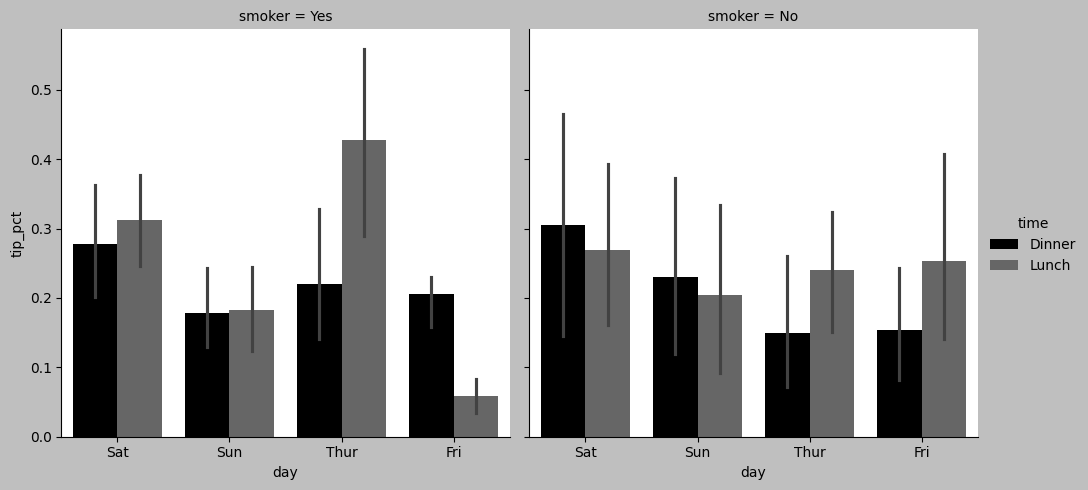

In [66]:
# Create sample data similar to the tips dataset
np.random.seed(0)
tips = pd.DataFrame({
    "total_bill": np.random.uniform(10, 50, 100),
    "tip": np.random.uniform(1, 10, 100),
    "day": np.random.choice(["Thur", "Fri", "Sat", "Sun"], 100),
    "time": np.random.choice(["Lunch", "Dinner"], 100),
    "smoker": np.random.choice(["Yes", "No"], 100)
})
tips["tip_pct"] = tips["tip"] / tips["total_bill"]  # Calculate tip percentage

# Create the categorical plot
sns.catplot(
    x="day", y="tip_pct", hue="time", col="smoker",
    kind="bar", data=tips[tips["tip_pct"] < 1]
)

# Show the plot
plt.show()

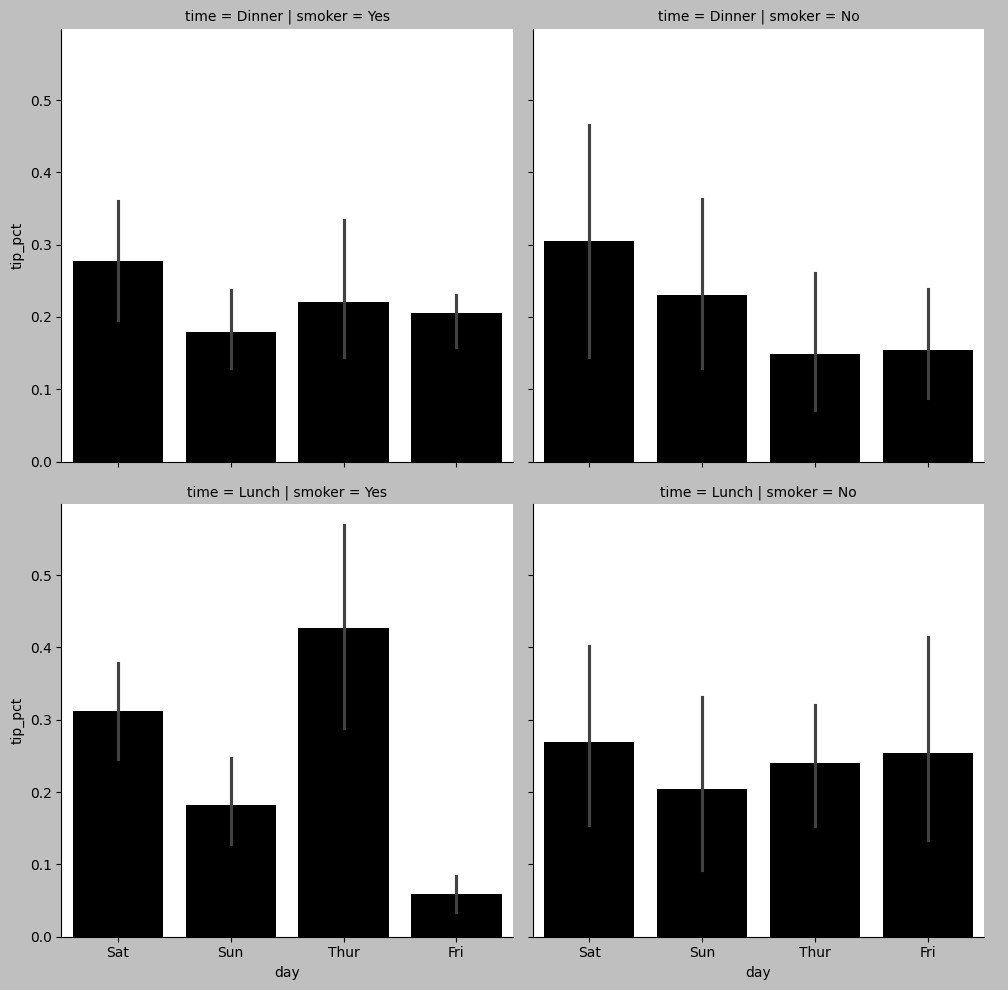

In [67]:
# Create sample data similar to the tips dataset
np.random.seed(0)
tips = pd.DataFrame({
    "total_bill": np.random.uniform(10, 50, 100),
    "tip": np.random.uniform(1, 10, 100),
    "day": np.random.choice(["Thur", "Fri", "Sat", "Sun"], 100),
    "time": np.random.choice(["Lunch", "Dinner"], 100),
    "smoker": np.random.choice(["Yes", "No"], 100)
})
tips["tip_pct"] = tips["tip"] / tips["total_bill"]  # Calculate tip percentage

# Create the categorical plot
sns.catplot(
    x="day", y="tip_pct", row="time", col="smoker",
    kind="bar", data=tips[tips["tip_pct"] < 1]
)

# Show the plot
plt.show()

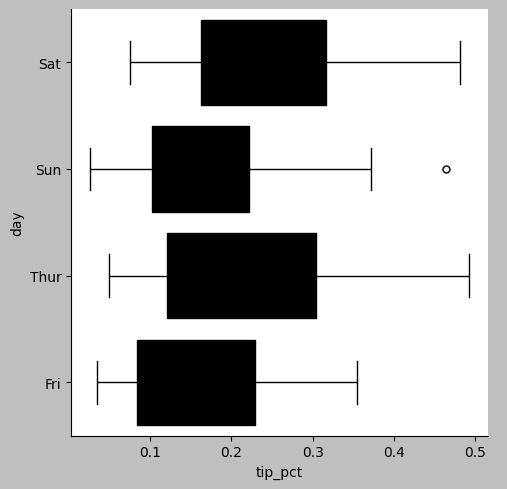

In [68]:
# Create sample data similar to the tips dataset
np.random.seed(0)
tips = pd.DataFrame({
    "total_bill": np.random.uniform(10, 50, 100),
    "tip": np.random.uniform(1, 10, 100),
    "day": np.random.choice(["Thur", "Fri", "Sat", "Sun"], 100),
})
tips["tip_pct"] = tips["tip"] / tips["total_bill"]  # Calculate tip percentage

# Create a box plot of tip_pct by day, filtered to tip_pct < 0.5
sns.catplot(x="tip_pct", y="day", kind="box", data=tips[tips["tip_pct"] < 0.5])

# Show the plot
plt.show()